


# **Deep Learning Algorithm to Detect Breast Cancer**
---
<br>

Using Artifical Neural Network to create a Deep Learning model for the detection of Breast Cancer.
<br>
<br>

Data set used: [WDBC DataSet](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data?select=data.csv)

<br>

*Please Note: To execute the code, download the dataset from the above link and upload it in the files section of the present Google Colab runtime session.*

<br>

Contributed by:

*   Soumyamoy Das
*   Kaushik Mahajan
*   Saheb Sarkar

<br>

Supervisor: Dr. Parama Bagchi

<br>
<!-- (RCCIIT B.Tech Final Year Project CSE 2022) -->

<!-- <br> -->
Completed on: 30th April 2022

<br>

(RCCIIT B.Tech Final Year Project CSE 2022)
<br><br>

In [ ]:
# importing necessary libraries

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# for importing dataset from drive
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# importing dataset

df=pd.read_csv("/data.csv")

In [ ]:
# print attributes' description

print(df.describe().T)

                         count          mean           std          min  \
id                       569.0  3.037183e+07  1.250206e+08  8670.000000   
radius_mean              569.0  1.412729e+01  3.524049e+00     6.981000   
texture_mean             569.0  1.928965e+01  4.301036e+00     9.710000   
perimeter_mean           569.0  9.196903e+01  2.429898e+01    43.790000   
area_mean                569.0  6.548891e+02  3.519141e+02   143.500000   
smoothness_mean          569.0  9.636028e-02  1.406413e-02     0.052630   
compactness_mean         569.0  1.043410e-01  5.281276e-02     0.019380   
concavity_mean           569.0  8.879932e-02  7.971981e-02     0.000000   
concave points_mean      569.0  4.891915e-02  3.880284e-02     0.000000   
symmetry_mean            569.0  1.811619e-01  2.741428e-02     0.106000   
fractal_dimension_mean   569.0  6.279761e-02  7.060363e-03     0.049960   
radius_se                569.0  4.051721e-01  2.773127e-01     0.111500   
texture_se               

In [ ]:
# count the no.of null entries for every attributes, and remove the null entries, if any

print(df.isnull().sum())

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [ ]:
# drop the column unnamed32 which has null value

df.drop(df.columns[[32]], axis = 1, inplace = True)

In [ ]:
# Renaming Diagnosis column to Label

df=df.rename(columns={'diagnosis':'Label'})

id                           int64
Label                       object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [ ]:
# print the datatypes of the attributes

print(df.dtypes)

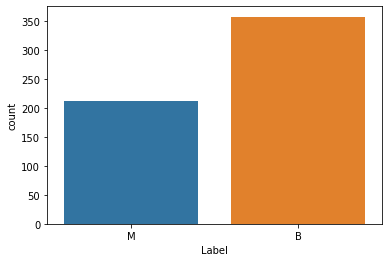

In [ ]:
# plot the no.of malignant and benign entries for illustration

sns.countplot(x="Label",data=df)

In [ ]:
#Replace categorical values with numbers

print("distribution of data:",df['Label'].value_counts())

#define the dependent variable that need to predicted

y=df['Label'].values

print("Label before encoding are:",np.unique(y))

#encoding categorical data from text(B and M) to integers(0 and 1)

from sklearn.preprocessing import LabelEncoder

labelencoder=LabelEncoder()

Y = labelencoder.fit_transform(y)
#M=1 B=0

print("Label encoding after encoding:",np.unique(Y))

distribution of data: B    357
M    212
Name: Label, dtype: int64
Label before encoding are: ['B' 'M']
Label encoding after encoding: [0 1]


In [ ]:
#define X and normalize /scale values
#define independent variables.drop Lable and id  and normaize the other data

X = df.drop(labels=["Label","id"],axis=1)
print(X.describe().T)#need scaling
print(df.shape)

                         count        mean         std         min  \
radius_mean              569.0   14.127292    3.524049    6.981000   
texture_mean             569.0   19.289649    4.301036    9.710000   
perimeter_mean           569.0   91.969033   24.298981   43.790000   
area_mean                569.0  654.889104  351.914129  143.500000   
smoothness_mean          569.0    0.096360    0.014064    0.052630   
compactness_mean         569.0    0.104341    0.052813    0.019380   
concavity_mean           569.0    0.088799    0.079720    0.000000   
concave points_mean      569.0    0.048919    0.038803    0.000000   
symmetry_mean            569.0    0.181162    0.027414    0.106000   
fractal_dimension_mean   569.0    0.062798    0.007060    0.049960   
radius_se                569.0    0.405172    0.277313    0.111500   
texture_se               569.0    1.216853    0.551648    0.360200   
perimeter_se             569.0    2.866059    2.021855    0.757000   
area_se             

In [ ]:
#scale/normalize tha values to bring to similar range

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(X)
X=scaler.transform(X)
print(X)      #scaled value

[[0.52103744 0.0226581  0.54598853 ... 0.91202749 0.59846245 0.41886396]
 [0.64314449 0.27257355 0.61578329 ... 0.63917526 0.23358959 0.22287813]
 [0.60149557 0.3902604  0.59574321 ... 0.83505155 0.40370589 0.21343303]
 ...
 [0.45525108 0.62123774 0.44578813 ... 0.48728522 0.12872068 0.1519087 ]
 [0.64456434 0.66351031 0.66553797 ... 0.91065292 0.49714173 0.45231536]
 [0.03686876 0.50152181 0.02853984 ... 0.         0.25744136 0.10068215]]


In [ ]:
#Splitting data into train and test to verify accuracy after fitting the model

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)
print("shape of the training data is:",X_train.shape)
print("shape of testing data is:",X_test.shape)

shape of the training data is: (426, 30)
shape of testing data is: (143, 30)


In [ ]:
# importing keras to build the neural network

from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout

In [ ]:
# Creating a model of 4 Dense Layers (So, total no.of layers in our CNN is 5)

from operator import mod
from pandas.core.algorithms import mode
model = Sequential()
model.add(Dense(20,input_dim=30,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(12,input_dim=20,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(4,input_dim=12,activation='relu'))
model.add(Dropout(0.1))
# model.add(Dense(2,input_dim=4,activation='relu'))
# model.add(Dropout(0.2))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                620       
                                                                 
 dropout (Dropout)           (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 12)                252       
                                                                 
 dropout_1 (Dropout)         (None, 12)                0         
                                                                 
 dense_2 (Dense)             (None, 4)                 52        
                                                                 
 dropout_2 (Dropout)         (None, 4)                 0         
                                                                 
 dense_3 (Dense)             (None, 1)                 5

In [ ]:
# Training the model with 100 epochs and batch size as 64

history=model.fit(X_train,y_train,verbose=1,epochs=100,batch_size=64,
                 validation_data=(X_test,y_test) )

Epoch 1/100
7/7 [==============================] - 1s 42ms/step - loss: 0.6908 - accuracy: 0.5446 - val_loss: 0.6808 - val_accuracy: 0.7133
Epoch 2/100
7/7 [==============================] - 0s 9ms/step - loss: 0.6815 - accuracy: 0.6362 - val_loss: 0.6688 - val_accuracy: 0.7832
Epoch 3/100
7/7 [==============================] - 0s 9ms/step - loss: 0.6708 - accuracy: 0.6995 - val_loss: 0.6565 - val_accuracy: 0.8252
Epoch 4/100
7/7 [==============================] - 0s 9ms/step - loss: 0.6637 - accuracy: 0.7324 - val_loss: 0.6432 - val_accuracy: 0.8392
Epoch 5/100
7/7 [==============================] - 0s 9ms/step - loss: 0.6515 - accuracy: 0.7183 - val_loss: 0.6312 - val_accuracy: 0.8392
Epoch 6/100
7/7 [==============================] - 0s 6ms/step - loss: 0.6456 - accuracy: 0.7418 - val_loss: 0.6186 - val_accuracy: 0.8531
Epoch 7/100
7/7 [==============================] - 0s 7ms/step - loss: 0.6299 - accuracy: 0.7887 - val_loss: 0.6033 - val_accuracy: 0.8741
Epoch 8/100
7/7 [=========

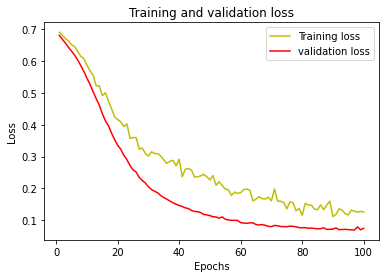

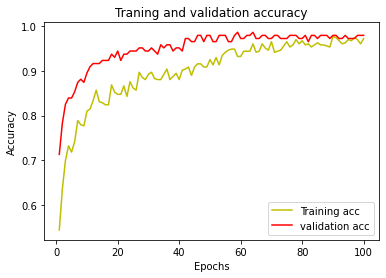

In [ ]:
# plot the training and validation accuracy and loss at each epoch

loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(loss)+1)
plt.plot(epochs,loss,'y',label='Training loss')
plt.plot(epochs,val_loss,'r',label='validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc =history.history['accuracy'] 
val_acc=history.history['val_accuracy']
plt.plot(epochs,acc,'y',label='Training acc')
plt.plot(epochs,val_acc,'r',label='validation acc')
plt.title('Traning and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show() 

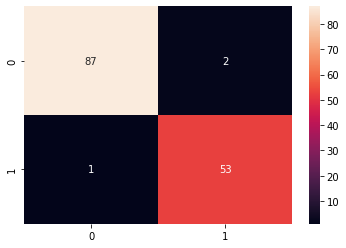

In [ ]:
# predicting the test set result 

y_pred = model.predict(X_test)
y_pred = (y_pred>0.5)

# generating the confusion matrix

from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)